<a href="https://colab.research.google.com/github/vamshigarega/DS/blob/master/SARIMA_OPTIMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

Loading the dowloaded data

In [2]:
df = pd.read_csv('data.csv')

,HouLoad
count,744.000000
mean,13246.141129
std,2958.430612
min,6990.000000
25%,11255.500000
50%,12828.500000
75%,15662.250000
max,19209.000000


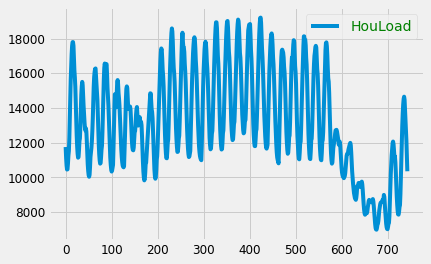

In [3]:
df.plot()
df.describe()

Data Preprocessing

Computing First and third Quartiles, Q1, Q3

In [4]:
q1, q3 = np.percentile(df, [25,75])
print(q1,q3)

11255.5 15662.25


Computing max limit=Q3+2*(Q3-Q1)

In [5]:
max_limit = q1+(2*(q3-q1))
print("The Maximmum Limit is:",max_limit)

The Maximmum Limit is: 20069.0


For (t in 1:T) {If data[t]> max limit; data[t]= max limit.

In [6]:
df.loc[df['HouLoad'] > max_limit, 'HouLoad'] = max_limit

Split data into training (80 percent) and test data

In [7]:
indices = np.arange(744)
labels = np.random.randint(2, size=744)
from sklearn.model_selection import train_test_split
X_train, X_test,y1,y2, idx1, idx2 = train_test_split(df['HouLoad'],labels, indices, test_size=0.2, random_state=42)

Fit the best SARIMA model using training data, retrieve parameters, similar to auto.arima in R.

In [8]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
s_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mi=[]
l=[]
for arima in pdq:
    for seasonal in s_pdq:
      model = SARIMAX(X_train,order=arima,seasonal_order=seasonal,enforce_stationarity=False,enforce_invertibility=False)
      results = model.fit()
      k=[]
      k.append(results.aic)
      k.append(arima)
      k.append(seasonal)
      l.append(k)
      mi.append(results.aic)
      print('ARIMA{}x{}24 - AIC:{}'.format(arima,seasonal,results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:12988.528952736524
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:12128.565109991307
ARIMA(0, 0, 0)x(0, 0, 2, 24)24 - AIC:11541.250549246757
ARIMA(0, 0, 0)x(0, 0, 3, 24)24 - AIC:10584.974593074077
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:11183.953329871532
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:10502.793487782961
ARIMA(0, 0, 0)x(0, 1, 2, 24)24 - AIC:9964.91228692671
ARIMA(0, 0, 0)x(0, 1, 3, 24)24 - AIC:9482.810425258976
ARIMA(0, 0, 0)x(0, 2, 0, 24)24 - AIC:11314.74197119901
ARIMA(0, 0, 0)x(0, 2, 1, 24)24 - AIC:10340.565492393773
ARIMA(0, 0, 0)x(0, 2, 2, 24)24 - AIC:9768.560526732417
ARIMA(0, 0, 0)x(0, 2, 3, 24)24 - AIC:9301.023758629723
ARIMA(0, 0, 0)x(0, 3, 0, 24)24 - AIC:13122.71345283831
ARIMA(0, 0, 0)x(0, 3, 1, 24)24 - AIC:11528.477346667018
ARIMA(0, 0, 0)x(0, 3, 2, 24)24 - AIC:10720.77724206167
ARIMA(0, 0, 0)x(0, 3, 3, 24)24 - AIC:10776.505867195652
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:11190.796973832734
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:11100.66075038844
A

KeyboardInterrupt: ignored

In [14]:
minaic=min(mi)
print("Minimum AIC Value is :", minaic)
for i in l:
  if(i[0]==minaic):
    a=list(i[1])
    s=list(i[2])
    p=a[0]
    d=a[1]
    q=a[2]
    P=s[0]
    D=s[1]
    Q=s[2]
    print("Finally Best Fit SARIMA Model with low AIC is :: ARIMA", i[1]," X SARIMA",i[2])

Minimum AIC Value is : 9156.035896704787
Finally Best Fit SARIMA Model with low AIC is :: ARIMA (0, 0, 0)  X SARIMA (3, 2, 3, 24)


In [11]:
my_order = (p, d, q)
my_seasonal_order = (P, D, Q, 24)
finalmodel = SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order)

Retrieve predictions for the next H=24 periods using SARIMA model.

In [12]:
model_fit = finalmodel.fit()
yhat = model_fit.predict(start = 735, end = 800, dynamic=True)

Receive figure 1

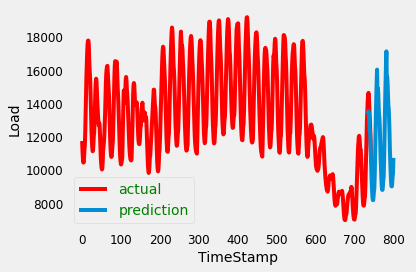

In [13]:
plt.plot(df,color='red',label='actual')
plt.plot(yhat,label='prediction')
plt.ylabel('Load')
plt.xlabel('TimeStamp')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()